<table align="left" width=100%>
    <tr>
        <td width="12%">
            <img src="../images/RA_Logo.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Linear Regression - 2 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/vidyadharbendre/learn_advanced_python_using_examples/blob/main/notebooks/OOPs/functions_linear_regression_hours_marks_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/vidyadharbendre/learn_advanced_python_using_examples/blob/main/notebooks/OOPs/functions_linear_regression_hours_marks_2.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
import statsmodels.api as sm

Sklearn Model R-squared: 0.6521157503858555
Statsmodels R-squared: 0.7597598292034168


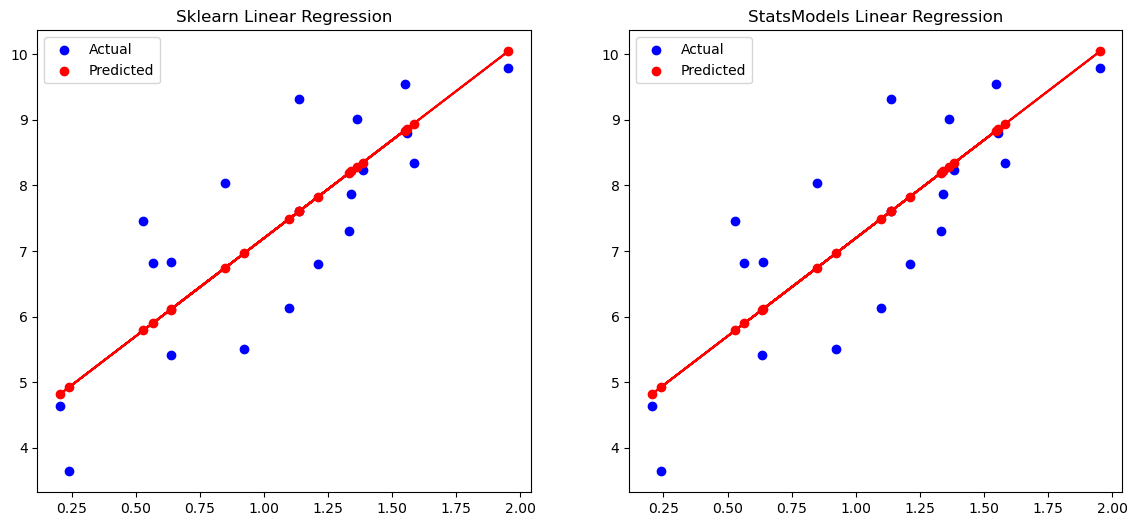

In [4]:
def load_data_from_numpy(X, y):
    return X, y

def load_data_from_csv(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    return X, y

def load_data_from_excel(file_path, sheet_name=0):
    data = pd.read_excel(file_path, sheet_name=sheet_name)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    return X, y

def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def fit_sklearn_linear_regression(X_train, y_train):
    model = SklearnLinearRegression()
    model.fit(X_train, y_train)
    return model

def predict_sklearn_linear_regression(model, X):
    return model.predict(X)

def evaluate_sklearn_linear_regression(model, X, y):
    predictions = model.predict(X)
    return r2_score(y, predictions)

def fit_statsmodels_linear_regression(X, y):
    X_b = sm.add_constant(X)
    model = sm.OLS(y, X_b).fit()
    return model

def predict_statsmodels_linear_regression(model, X):
    X_b = sm.add_constant(X)
    return model.predict(X_b)

def evaluate_statsmodels_linear_regression(model, X, y):
    predictions = model.predict(sm.add_constant(X))
    return model.rsquared

# Generate Data and Load
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Data split
X_train, X_test, y_train, y_test = split_data(X, y)

# Sklearn Linear Regression model
sklearn_model = fit_sklearn_linear_regression(X_train, y_train)
predictions_sklearn = predict_sklearn_linear_regression(sklearn_model, X_test)
r2_sklearn = evaluate_sklearn_linear_regression(sklearn_model, X_test, y_test)
print(f"Sklearn Model R-squared: {r2_sklearn}")

# StatsModels Linear Regression model
model_statsmodels = fit_statsmodels_linear_regression(X_train, y_train)
predictions_statsmodels = predict_statsmodels_linear_regression(model_statsmodels, X_test)
r2_statsmodels = evaluate_statsmodels_linear_regression(model_statsmodels, X_test, y_test)
print(f"Statsmodels R-squared: {r2_statsmodels}")

# Plot results side by side
plt.figure(figsize=(14, 6))

# Sklearn results
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, predictions_sklearn, color='red', label='Predicted')
plt.plot(X_test, predictions_sklearn, color='red')
plt.legend()
plt.title("Sklearn Linear Regression")

# StatsModels results
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, predictions_statsmodels, color='red', label='Predicted')
plt.plot(X_test, predictions_statsmodels, color='red')
plt.legend()
plt.title("StatsModels Linear Regression")

plt.show()